In [568]:
# IMPORT STATEMENTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
# SAVE KAPRSAC JET FUEL PRICES IN A DATAFRAME
df_org = pd.read_csv("KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set
df = df_org.copy() 

In [511]:
# PRELIMINARY STATS:
df.describe()

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
count,7626.000000
mean,1.407106
std,0.897850
min,0.282000
25%,0.581000
50%,1.199000
75%,2.007750
max,4.814000


In [512]:
# CLEAN UP DATA TO PERFORM GROUPBY ANALYSIS
df['YEAR'] = df['Date'].astype(str).str[0:4]
# df = df[df['YEAR'].astype(int) >= 2010] # filters only years from 2010 to 2020
df['MONTH'] = df['Date'].astype(str).str[5:7]
df['DAY'] = df['Date'].astype(str).str[8:10]
del df['Date']

In [513]:
#CHANGE NUMERICAL MONTH TO MONTHS
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}

In [514]:
df['MONTH'] = df['MONTH'].apply(lambda x: month_lookup[x])

In [515]:
df['MONTH YEAR'] = df['MONTH'] + ' ' +  df['YEAR']
df.set_index('MONTH YEAR')

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,DAY
MONTH YEAR,,,,
August 2004,1.250,2004,August,22
August 2004,1.207,2004,August,05
August 2004,1.208,2004,August,01
July 2004,1.190,2004,July,28
July 2004,1.128,2004,July,14
...,...,...,...,...
September 2012,3.218,2012,September,05
August 2012,3.225,2012,August,26
August 2012,3.162,2012,August,19


In [516]:
# FIND MEAN OF THESE PRICES
jet_fuel = df.groupby(['MONTH YEAR']).mean()

In [490]:
# IMPORT BTS DOMESTICS DATA DEPARTURES PERFORMED
dom_flight = pd.read_csv('USCarrier_Traffic_DOM.csv', sep='","', engine='python', skiprows=1)
dom_flight.drop(dom_flight.tail(1).index,inplace=True) # drop last column

In [491]:
# RENAME COLUMNS
dom_flight.index.name = 'Period'
dom_flight.rename(columns={'Unit: (000)': 'Total(DOM)'}, inplace=True)

In [492]:
# CLEANUP DATA
dom_flight['PERIOD'] = dom_flight.index
dom_flight['PERIOD'] = dom_flight['PERIOD'].astype(str).str[1:]
dom_flight.set_index('PERIOD')
dom_flight['Total(DOM)'] = dom_flight['Total(DOM)'].astype(str).str[:-1]

In [493]:
dom_flight.set_index('PERIOD', inplace=True)

In [494]:
dom_flight.head()

,Total(DOM)
PERIOD,
January 2000,623794
February 2000,605936
March 2000,667027
April 2000,635767
May 2000,672835


In [497]:
# IMPORT BTS INTERNATIONAL DATA DEPARTURES PERFORMED
intl_flight = pd.read_csv('USCarrier_Traffic_INTL.csv', sep='","', engine='python', skiprows=1)
intl_flight.drop(intl_flight.tail(1).index,inplace=True)

In [498]:
# RENAME COLUMNS
intl_flight.index.name = 'Period'
intl_flight.rename(columns={'Unit: (000)': 'Total(INTL)'}, inplace=True)

In [499]:
# CLEANUP DATA
intl_flight['PERIOD'] = intl_flight.index
intl_flight['PERIOD'] = intl_flight['PERIOD'].astype(str).str[1:]
intl_flight.set_index('PERIOD')
intl_flight['Total(INTL)'] = intl_flight['Total(INTL)'].astype(str).str[:-1]

In [500]:
intl_flight.set_index('PERIOD', inplace=True)

In [501]:
intl_flight.head()

,Total(INTL)
PERIOD,
January 2000,51459
February 2000,49157
March 2000,54263
April 2000,52826
May 2000,55358


In [502]:
# CREATE COMBINED FLIGHT DATAFRAME
combined_flight = dom_flight.copy()

In [503]:
combined_flight['Total(INTL)'] = intl_flight['Total(INTL)']

In [504]:
combined_flight['TOTAL'] = combined_flight['Total(DOM)'].astype(int) + combined_flight['Total(INTL)'].astype(int)

In [505]:
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [351]:
# OIL PRICES BY MONTH AND YEAR
oil_prices = df.groupby(['YEAR', 'MONTH']).mean()

In [352]:
oil_prices

U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
YEAR MONTH                                                                                     
2010 April                                              2.242900                               
     August                                             2.081957                               
     December                                           2.456952                               
     February                                           2.001056                               
     January                                            2.047500                               
...                                                          ...                               
2020 January                                            1.769727                               
     July                                               1.056000                               
     June                                               0.989818                               
     March                                              0.940130                               
     May                                                0.704650                               

[127 rows x 1 columns]

In [520]:
# TIME SERIES
import datetime
df_time = pd.read_csv("KARPSAC-jetfuelprices-2010to2020.csv", sep=";") # original data set

In [521]:
df_time['Date'] = pd.to_datetime(df_time['Date'])

In [463]:
# df_time = df_time[df_time['Date'].astype(str).str[0:4].astype(int) >= 2010]

In [522]:
df_time

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
0,2004-08-22 20:00:00-04:00,1.250
1,2004-08-05 20:00:00-04:00,1.207
2,2004-08-01 20:00:00-04:00,1.208
3,2004-07-28 20:00:00-04:00,1.190
4,2004-07-14 20:00:00-04:00,1.128
...,...,...
7621,2012-09-05 20:00:00-04:00,3.218
7622,2012-08-26 20:00:00-04:00,3.225
7623,2012-08-19 20:00:00-04:00,3.162
7624,2012-08-16 20:00:00-04:00,3.163


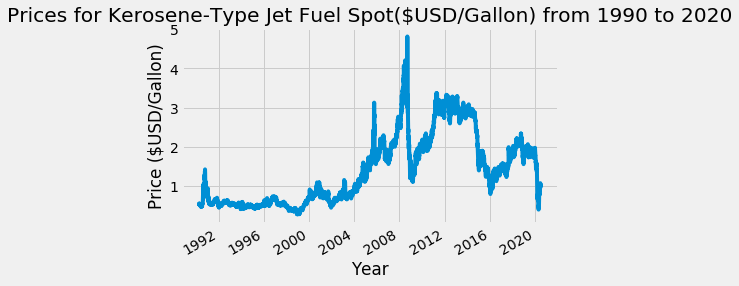

<Figure size 432x288 with 0 Axes>

In [721]:
#PRICE CHANGES 1990 to 2020:
ax = plt.gca()
df_time.plot(kind='line', x='Date', y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', ax=ax)

# FORMATTING:
plt.title('Prices for Kerosene-Type Jet Fuel Spot($USD/Gallon) from 1990 to 2020')
plt.xlabel('Year')
plt.ylabel('Price ($USD/Gallon)')
ax.get_legend().remove()
plt.savefig('price-changes-1990to2020.png', dpi=75, bbox_inches='tight')

plt.show()
plt.draw()

In [524]:
# REFRESHER ON CLEANED DATA
combined_flight

,Total(DOM),Total(INTL),TOTAL
PERIOD,,,
January 2000,623794,51459,675253
February 2000,605936,49157,655093
March 2000,667027,54263,721290
April 2000,635767,52826,688593
May 2000,672835,55358,728193
...,...,...,...
December 2019,729109,74909,804018
January 2020,708984,73377,782361
February 2020,668537,67801,736338


In [526]:
jet_fuel

,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
MONTH YEAR,
April 1990,0.540045
April 1991,0.552773
April 1992,0.545238
April 1993,0.551158
April 1994,0.469050
...,...
September 2015,1.392952
September 2016,1.321000
September 2017,1.778789


In [532]:
# Combine two tables together since they have the same index:
flight_and_fuel = pd.concat([combined_flight, jet_fuel], axis=1) 
# Get rid of NA values since flight data is of smaller range:
flight_and_fuel = flight_and_fuel[flight_and_fuel['Total(DOM)'].notna()] 
flight_and_fuel

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
January 2000,623794,51459,675253.0,0.781650
February 2000,605936,49157,655093.0,0.780950
March 2000,667027,54263,721290.0,0.768500
April 2000,635767,52826,688593.0,0.719500
May 2000,672835,55358,728193.0,0.763409
...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773
January 2020,708984,73377,782361.0,1.769727
February 2020,668537,67801,736338.0,1.513350
March 2020,621760,53870,675630.0,0.940130


In [613]:
# ADD MONTH AND YEAR FILTER COLUMNS
flight_and_fuel['YEAR'] = flight_and_fuel.index.astype(str).str[-4:]
flight_and_fuel['MONTH'] = flight_and_fuel.index.astype(str).str[:-4]
# ABRV FOR LABELS
flight_and_fuel['ABRV'] = flight_and_fuel['MONTH'].astype(str).str[:3] + ' ' + flight_and_fuel['YEAR']
flight_and_fuel

,Total(DOM),Total(INTL),TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
January 2000,623794,51459,675253.0,0.781650,2000,January,Jan 2000
February 2000,605936,49157,655093.0,0.780950,2000,February,Feb 2000
March 2000,667027,54263,721290.0,0.768500,2000,March,Mar 2000
April 2000,635767,52826,688593.0,0.719500,2000,April,Apr 2000
May 2000,672835,55358,728193.0,0.763409,2000,May,May 2000
...,...,...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020
March 2020,621760,53870,675630.0,0.940130,2020,March,Mar 2020


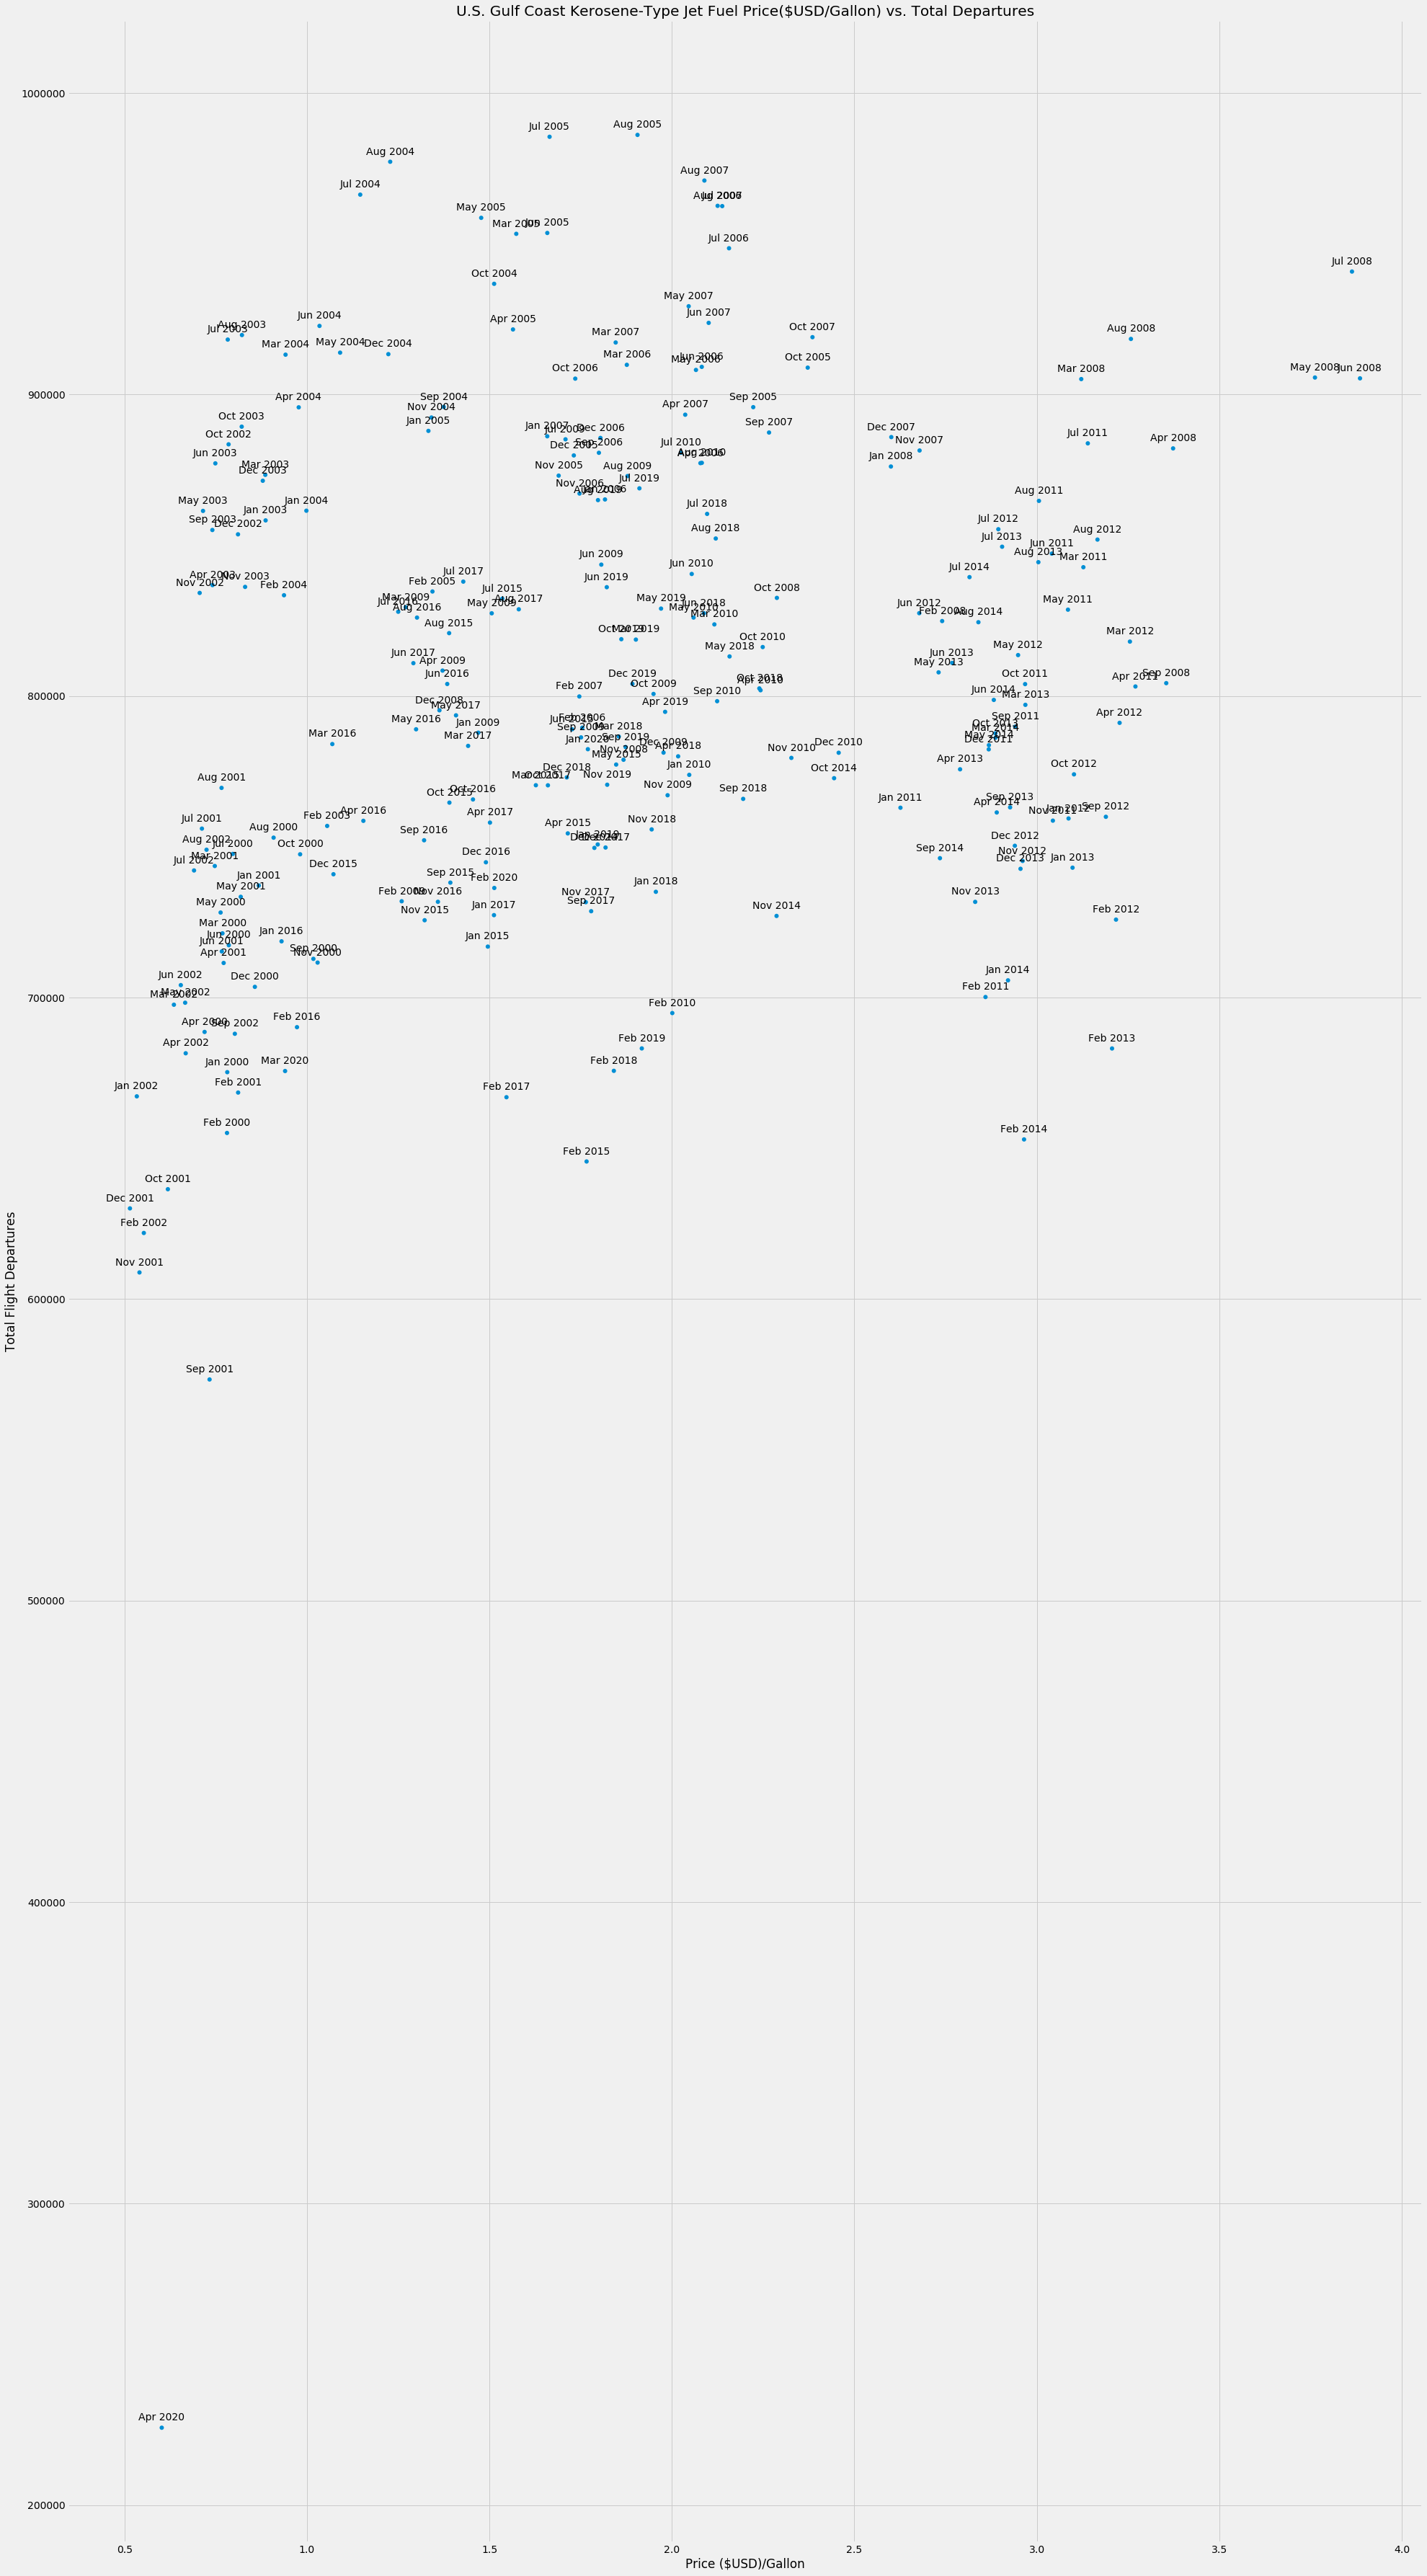

In [645]:
# SCATTER PLOT:
fig, ax = plt.subplots(figsize=(30,60))
ax.scatter(x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
           y=flight_and_fuel['TOTAL'], edgecolors='none')

for x,y,date in zip(flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'], 
              flight_and_fuel['TOTAL'], flight_and_fuel['ABRV']):
    
    label = "{}".format(date)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.style.use('fivethirtyeight')
plt.title('U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures')
plt.xlabel('Price ($USD)/Gallon')
plt.ylabel('Total Flight Departures')
plt.savefig('us-jet-prices-vs-total-departures.png', dpi=100, bbox_inches='tight')

In [642]:
# INTERACTIVE CHART:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [647]:
# data = [go.Scatter(x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
#            y=flight_and_fuel['TOTAL'], mode='markers', marker=dict(
#                         size=12,
#                         line = {'width':2} #line of marker
#                     ),textposition='top center')]

# layout = go.Layout(title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
#                     xaxis=dict(title='Price ($USD)/Gallon'),
#                    yaxis=dict(title='Total Flight Departures'),
#                    hovermode='closest')

# fig = go.Figure(data=data,layout=layout)
# pyo.plot(fig, filename='jet-vs-tot-departures.html')

In [657]:
# MORE DESCRIPTIVE:
flight_and_fuel_desc = flight_and_fuel.copy()
flight_and_fuel_desc.rename(columns={'TOTAL': 'Total (Domestic and International) Flights Departed'}, inplace=True)
flight_and_fuel_desc

,Total(DOM),Total(INTL),Total (Domestic and International) Flights Departed,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH,ABRV
January 2000,623794,51459,675253.0,0.781650,2000,January,Jan 2000
February 2000,605936,49157,655093.0,0.780950,2000,February,Feb 2000
March 2000,667027,54263,721290.0,0.768500,2000,March,Mar 2000
April 2000,635767,52826,688593.0,0.719500,2000,April,Apr 2000
May 2000,672835,55358,728193.0,0.763409,2000,May,May 2000
...,...,...,...,...,...,...,...
December 2019,729109,74909,804018.0,1.891773,2019,December,Dec 2019
January 2020,708984,73377,782361.0,1.769727,2020,January,Jan 2020
February 2020,668537,67801,736338.0,1.513350,2020,February,Feb 2020
March 2020,621760,53870,675630.0,0.940130,2020,March,Mar 2020


In [691]:
#TOTAL DEPARTURES INTERACTIVE:
fig = px.scatter(flight_and_fuel_desc, x='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon',
                 y='Total (Domestic and International) Flights Departed', hover_name='ABRV', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='YEAR')
fig.update_layout(
    title="U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total, Domestic, International Flight Departures",
    xaxis_title="U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon ($USD/Gallon)",
    yaxis_title="Number of flight departures",
    legend_title="Filter by year",
    font=dict(
        family="Courier New, monospace",
        size=12
    )
)
fig.show()
#TO WRITE TO HTML: fig.write_html('US Gulf Coast Kerosene Jet Fuel Price vs. Flight Departures.html')

In [717]:
# COMPARE DOMESTIC, INTL, AND TOTAL FLIGHTS:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['TOTAL'],
    name="TOTAL FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}',
))

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['Total(DOM)'],
    name="DOMESTIC FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}',
))

fig2.add_trace(go.Scatter(
    x=flight_and_fuel['U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon'],
    y=flight_and_fuel['Total(INTL)'],
    name="INTL FLIGHTS",       # this sets its legend entry
    mode='markers',
    text=flight_and_fuel['ABRV'], 
    hovertemplate='%{text} <br> KEROSENE JET FUEL PRICE: $%{x} <br> TOTAL FLIGHTS DEPARTED: %{y}'
))


fig2.update_layout(
    title="U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total, Domestic, International Flight Departures",
    xaxis_title="U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon ($USD/Gallon)",
    yaxis_title="Number of flight departures",
    legend_title="Type of Flights",
    font=dict(
        family="Courier New, monospace",
        size=12
    )
)

fig2.show()
fig2.write_html('US Gulf Coast Kerosene Jet Fuel Price vs. Flight Departures')

In [711]:
## REFRESHER ON DF TIME CLEANED DATA
df_time['YEAR'] = df_time['Date'].astype(str).str[:4]
df_time['MONTH'] = df_time['Date'].astype(str).str[5:7]
month_lookup = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
                '06': 'June', '07': 'July', '08': 'August', '09': 'September', '10': 'October',
                '11': 'November','12': 'December'}
df_time['MONTH'] = df_time['MONTH'].apply(lambda x: month_lookup[x])
df_time

,Date,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,YEAR,MONTH
0,2004-08-22 20:00:00-04:00,1.250,2004,August
1,2004-08-05 20:00:00-04:00,1.207,2004,August
2,2004-08-01 20:00:00-04:00,1.208,2004,August
3,2004-07-28 20:00:00-04:00,1.190,2004,July
4,2004-07-14 20:00:00-04:00,1.128,2004,July
...,...,...,...,...
7621,2012-09-05 20:00:00-04:00,3.218,2012,September
7622,2012-08-26 20:00:00-04:00,3.225,2012,August
7623,2012-08-19 20:00:00-04:00,3.162,2012,August
7624,2012-08-16 20:00:00-04:00,3.163,2012,August


In [714]:
# FUEL PRICES BY YEAR
fig3 = px.scatter(df_time, x='Date',
                 y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='YEAR')

fig3.show()

In [715]:
# FUEL PRICES BY MONTH:
fig4 = px.scatter(df_time, x='Date',
                 y='U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon', title='U.S. Gulf Coast Kerosene-Type Jet Fuel Price($USD/Gallon) vs. Total Departures',
                color='MONTH')

fig4.show()

In [718]:
flight_and_fuel.corr()

,TOTAL,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon
TOTAL,1.000000,0.234909
U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB in U.S. Dollars per Gallon,0.234909,1.000000
